# Activity: Build a decision tree

## Introduction

A decision tree model can makes predictions for a target based on multiple features. Because decision trees are used across a wide array of industries, becoming proficient in the process of building one will help you expand your skill set in a widely-applicable way.   

For this activity, you work as a consultant for an airline. The airline is interested in predicting whether a future customer would be satisfied with their services given previous customer feedback about their flight experience. The airline would like you to construct and evaluate a model that can accomplish this goal. Specifically, they are interested in knowing which features are most important to customer satisfaction.

The data for this activity includes survey responses from 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others. In a previous activity, you utilized a binomial logistic regression model to help the airline better understand this data. In this activity, your goal will be to utilize a decision tree model to predict whether or not a customer will be satisfied with their flight experience. 

Because this activity uses a dataset from the industry, you will need to conduct basic EDA, data cleaning, and other manipulations to prepare the data for modeling.

In this activity, you’ll practice the following skills:

* Importing packages and loading data
* Exploring the data and completing the cleaning process
* Building a decision tree model 
* Tuning hyperparameters using `GridSearchCV`
* Evaluating a decision tree model using a confusion matrix and various other plots

## Step 1: Imports

Import relevant Python packages. Use `DecisionTreeClassifier`,` plot_tree`, and various imports from `sklearn.metrics` to build, visualize, and evaluate the model.

### Import packages

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

path = "D:/Pulkit/2017 Class-XII/Google Advanced Data Analytics Professional Certificate/5 - Regression Analysis/Datasets/"

### Load the dataset

`Pandas` is used to load the **Invistico_Airline.csv** dataset. The resulting pandas DataFrame is saved in a variable named `df_original`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [5]:
# RUN THIS CELL TO IMPORT YOUR DATA.
df0 = pd.read_csv(path + 'airline_train.csv')
df0.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use a function from the pandas library to read in the csv file.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the `read_csv` function and pass in the file name as a string. 

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use `pd.read_csv("insertfilenamehere")`.

</details>

## Step 2: Data exploration, data cleaning, and model preparation

### Prepare the data

After loading the dataset, prepare the data to be suitable for decision tree classifiers. This includes: 

*   Exploring the data
*   Checking for missing values
*   Encoding the data
*   Renaming a column
*   Creating the training and testing data

In [18]:
df = df0.copy()
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


### Explore the data

Check the data type of each column. Note that decision trees expect numeric data. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `dtypes` attribute on the DataFrame.
</details>

### Output unique values 

The `Class` column is ordinal (meaning there is an inherent order that is significant). For example, airlines typically charge more for 'Business' than 'Eco Plus' and 'Eco'. Output the unique values in the `Class` column. 

In [8]:
df.Class.value_counts()

Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64

<details>
  <summary><h4><strong> Hint 1 </strong></h4></summary>

Use the `unique()` function on the column `'Class'`.

</details>

### Check the counts of the predicted labels

In order to predict customer satisfaction, verify if the dataset is imbalanced. To do this, check the counts of each of the predicted labels. 

In [9]:
df.satisfaction.value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

<details>
  <summary><h4><strong> Hint 1</strong> </h4></summary>

Use a function from the pandas library that returns a pandas series containing counts of unique values. 

</details>

<details>
  <summary><h4><strong> Hint 2</strong> </h4></summary>

Use the `value_counts()` function. Set the `dropna` parameter passed in to this function to `False` if you want to examine how many NaN values there are. 

</details>

In [10]:
58879/103904*100

56.666730828457034

**Question:** How many satisfied and dissatisfied customers were there?

Dissatisfied:satidfied were in the ratio 14:11

**Question:** What percentage of customers were satisfied? 

56.67%

### Check for missing values

The sklearn decision tree implementation does not support missing values. Check for missing values in the rows of the data. 

310 null values in `Arrival Delay in Minutes` column 

<details>
  <summary><h4><strong>Hint 1</h4></summary></strong>

Use the `isnull` function and the `sum` function. 

</details>

<details>
  <summary><h4><strong> Hint 2 </strong> </h4></summary>

To get the number of rows in the data with missing values, use the `isnull` function followed by the `sum` function.

</details>

**Question:** Why is it important to check how many rows and columns there are in the dataset?

To know how large the dataset is and how many features are there.

### Check the number of rows and columns in the dataset

13904 rows and 25 columns

<details>
  <summary><h4><strong> Hint 1 </strong> </h4></summary>

Use the `shape` attribute on the DataFrame.

</details>

### Drop the rows with missing values

Drop the rows with missing values and save the resulting pandas DataFrame in a variable named `df_subset`.

In [31]:
df_subset = df.dropna().reset_index(drop=True)

<details>
  <summary><h4><strong> Hint 1 </strong> </h4></summary>

Use the `dropna` function.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Set the axis parameter passed into the `dropna` function to `0` if you want to drop rows containing missing values, or `1` if you want to drop columns containing missing values. Optionally, use reset_index to avoid a SettingWithCopy warning later in the notebook. 

</details>

### Check the number of rows and columns in the dataset again

Check how many rows and columns are remaining in the dataset. You should now have 310 fewer rows of data.

In [32]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103594 entries, 0 to 103593
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103594 non-null  int64  
 1   id                                 103594 non-null  int64  
 2   Gender                             103594 non-null  object 
 3   Customer Type                      103594 non-null  object 
 4   Age                                103594 non-null  int64  
 5   Type of Travel                     103594 non-null  object 
 6   Class                              103594 non-null  object 
 7   Flight Distance                    103594 non-null  int64  
 8   Inflight wifi service              103594 non-null  int64  
 9   Departure/Arrival time convenient  103594 non-null  int64  
 10  Ease of Online booking             103594 non-null  int64  
 11  Gate location                      1035

### Encode the data

Five columns (`satisfaction`, `Customer Type`, `Type of Travel`, `Gender`, `Class`) are the pandas dtype object. Decision trees need numeric columns. Start by converting the ordinal `Class` column into numeric. 

In [33]:
le = LabelEncoder().fit(df_subset.Class)
df_subset.Class = le.transform(df_subset.Class)

In [34]:
df_subset.Class

0         2
1         0
2         0
3         0
4         0
         ..
103589    1
103590    0
103591    0
103592    1
103593    0
Name: Class, Length: 103594, dtype: int32

<details>
  <summary><h4><strong> Hint 1 </strong> </h4></summary>

Use the `map()` or `replace()` function. 

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

For both functions, you will need to pass in a dictionary of class mappings `{"Business": 3, "Eco Plus": 2, "Eco": 1})`.

</details>

### Represent the data in the target variable numerically

To represent the data in the target variable numerically, assign `"satisfied"` to the label `1` and `"dissatisfied"` to the label `0` in the `satisfaction` column. 

In [35]:
df_subset.satisfaction = df_subset.satisfaction.map({'satisfied': 1, 'neutral or dissatisfied': 0})

In [36]:
df_subset.satisfaction

0         0
1         0
2         1
3         0
4         1
         ..
103589    0
103590    1
103591    0
103592    0
103593    0
Name: satisfaction, Length: 103594, dtype: int64

<details>
  <summary><h4><strong> Hint 1 </strong> </h4></summary>

Use the `map()` function to assign existing values in a column to new values.

</details>

<details>
  <summary><h4><strong> Hint 2 </strong></h4></summary>

Call `map()` on the `satisfaction` column and pass in a dictionary specifying that `"satisfied"` should be assigned to `1` and `"dissatisfied"` should be assigned to `0`.

</details>

<details>
  <summary><h4><strong> Hint 3 </strong></h4></summary>

Update the `satisfaction` column in `df_subset` with the newly assigned values.

</details>

### Convert categorical columns into numeric

There are other columns in the dataset that are still categorical. Be sure to convert categorical columns in the dataset into numeric.

In [42]:
df_subset['IsFemale'] = df_subset.Gender.map({'Male': 0, 'Female': 1})

In [39]:
df_subset['Customer Type'].value_counts()

Loyal Customer       84662
disloyal Customer    18932
Name: Customer Type, dtype: int64

In [40]:
df_subset['IsLoyal'] = df_subset['Customer Type'].map({'Loyal Customer': 1, 'disloyal Customer': 0})

In [41]:
df_subset['Type of Travel'].value_counts()

Business travel    71465
Personal Travel    32129
Name: Type of Travel, dtype: int64

In [45]:
df_subset['IsPersonalTravel'] = df_subset['Type of Travel'].map({'Personal Travel': 1, 'Business travel': 0})

In [54]:
df_subset.head()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,IsLoyal,IsFemale,IsPersonalTravel
0,13,2,460,3,4,3,1,5,3,5,...,4,4,5,5,25,18.0,0,1,0,1
1,25,0,235,3,2,3,3,1,3,1,...,3,1,4,1,1,6.0,0,0,0,0
2,26,0,1142,2,2,2,2,5,5,5,...,4,4,4,5,0,0.0,1,1,1,0
3,25,0,562,2,5,5,5,2,2,2,...,3,1,4,2,11,9.0,0,1,1,0
4,61,0,214,3,3,3,3,4,5,5,...,4,3,3,3,0,0.0,1,1,0,0


In [47]:
df_subset.drop(columns=['Unnamed: 0', 'id', 'Gender', 'Type of Travel', 'Customer Type'], inplace=True)

<details>
  <summary><h4><strong> Hint 1 </strong> </h4></summary>

Use the `get_dummies()` function. 

</details>

<details>
  <summary><h4><strong> Hint 2 </strong></h4></summary>

Set the `drop_first` parameter to `True`. This removes redundant data.

</details>

### Check column data types

Now that you have converted categorical columns into numeric, check your column data types.

In [55]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103594 entries, 0 to 103593
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                103594 non-null  int64  
 1   Class                              103594 non-null  int32  
 2   Flight Distance                    103594 non-null  int64  
 3   Inflight wifi service              103594 non-null  int64  
 4   Departure/Arrival time convenient  103594 non-null  int64  
 5   Ease of Online booking             103594 non-null  int64  
 6   Gate location                      103594 non-null  int64  
 7   Food and drink                     103594 non-null  int64  
 8   Online boarding                    103594 non-null  int64  
 9   Seat comfort                       103594 non-null  int64  
 10  Inflight entertainment             103594 non-null  int64  
 11  On-board service                   1035

<details>
  <summary><h4><strong> Hint 1</strong></h4></summary>

Use the `dtypes` attribute on the DataFrame.

</details>

### Create the training and testing data

Put 75% of the data into a training set and the remaining 25% into a testing set. 

In [56]:
X = df_subset.drop('satisfaction', axis=1)
y = df_subset.satisfaction

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=32)

<details>
  <summary><h4><strong> Hint 1</strong></h4></summary>

Use `train_test_split`.

</details>

<details>
  <summary><h4><strong> Hint 2</strong></h4></summary>

Pass in `0` to `random_state`.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

If you named your features matrix X and your target y, then it would be `train_test_split(X, y, test_size=0.25, random_state=0)`.

</details>

## Step 3: Model building

### Fit a decision tree classifier model to the data

Make a decision tree instance called `decision_tree` and pass in `0` to the `random_state` parameter. This is only so that if other data professionals run this code, they get the same results. Fit the model on the training set, use the `predict()` function on the testing set, and assign those predictions to the variable `dt_pred`. 

In [57]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
pred = tree.predict(X_test)

<details>
  <summary><h4><strong> Hint 1</strong></h4></summary>

Use `DecisionTreeClassifier`, the `fit()` function, and the `predict()` function.

</details>

**Question:** What are some advantages of using decision trees versus other models you have learned about? 

- It is not affected by hierchy of encoded categorical variables unlike regression techniques.
- It can easily work for multiclass classification.

## Step 4: Results and evaluation

Print out the decision tree model's accuracy, precision, recall, and F1 score.

In [59]:
print("Recall Score = ", recall_score(y_test, pred))
print("Precision Score= ", precision_score(y_test, pred))
print("F1 Score = ", f1_score(y_test, pred))
print("Accuracy Score = ", accuracy_score(y_test, pred))

Recall Score =  0.9406079775083465
Precision Score=  0.9349401798969522
F1 Score =  0.9377655148250339
Accuracy Score =  0.9451330167187922


<details>
  <summary><h4><strong> Hint 1</strong></h4></summary>

Use four different functions from `metrics` to get the accuracy, precision, recall, and F1 score.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Input `y_test` and `y_pred` into the `metrics.accuracy_score`, `metrics.precision_score`, `metrics.recall_score` and `metrics.f1_score` functions.
    
</details> 

**Question:** Are there any additional steps you could take to improve the performance or function of your decision tree?

The model is highly successful. We can change the hyperparameters but it could risk creating an overfitted model.

### Produce a confusion matrix

Data professionals often like to know the types of errors made by an algorithm. To obtain this information, produce a confusion matrix.

In [62]:
confusion_matrix(y_test, pred, labels=tree.classes_)

array([[13772,   745],
       [  676, 10706]], dtype=int64)

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about plotting a confusion matrix](https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/lecture/SpRqe/evaluate-a-binomial-logistic-regression-model).

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use `metrics.confusion_matrix`, `metrics.ConfusionMatrixDisplay`, and the `plot()` function.

</details>

**Question:** What patterns can you identify between true positives and true negatives, as well as false positives and false negatives?

Both trues are pretty high while both falses are pretty low which reflects in the various scores.

### Plot the decision tree

Examine the decision tree. Use `plot_tree` function to produce a visual representation of the tree to pinpoint where the splits in the data are occurring.

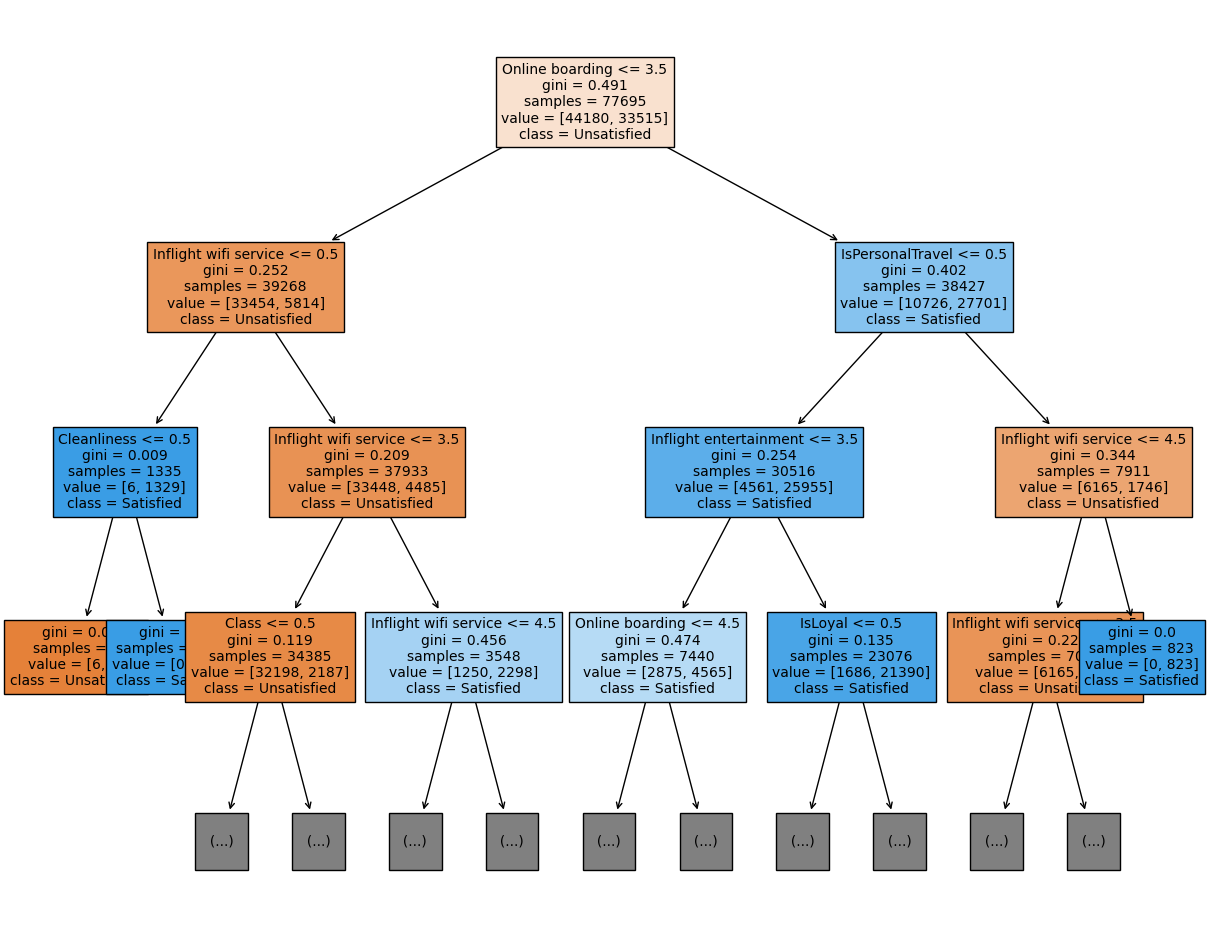

In [80]:
plt.figure(figsize = (15, 12))
plot_tree(tree, max_depth=3, feature_names=X.columns, class_names={0: 'Unsatisfied', 1: 'Satisfied'}, filled=True, fontsize=10);

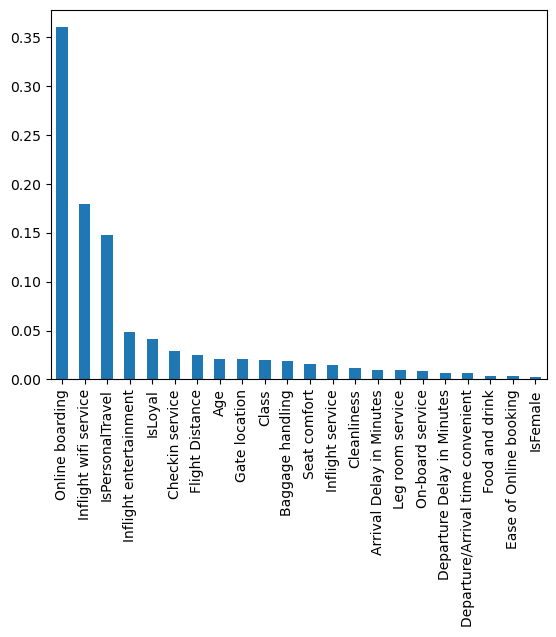

In [123]:
importances = tree.feature_importances_

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

If your tree is hard to read, pass `2` or `3` in the parameter `max_depth`. 

</details>

### Hyperparameter tuning

Knowing how and when to adjust or tune a model can help a data professional significantly increase performance. In this section, you will find the best values for the hyperparameters `max_depth` and `min_samples_leaf` using grid search and cross validation. Below are some values for the hyperparameters `max_depth` and `min_samples_leaf`.   

In [124]:
#par_range = {'max_depth': [4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 30, 40, 50], 'min_samples_leaf': [2, 5, 10, 20, 50]}
#par_range = {'max_depth': [13, 14, 15, 16, 17, 18], 'min_samples_leaf': [2, 3, 4, 5, 6, 7, 10]}
par_range = {'max_depth': [16, 17, 18], 'min_samples_leaf': [2, 3, 5, 8, 10]}
scoring = ['precision', 'recall', 'accuracy', 'f1']

### Check combinations of values

Check every combination of values to examine which pair has the best evaluation metrics. Make a decision tree instance called `tuned_decision_tree` with `random_state=0`, make a `GridSearchCV` instance called `clf`, make sure to refit the estimator using `"f1"`, and fit the model on the training set. 

**Note:** This cell may take up to 15 minutes to run.

In [125]:
tuned_tree = DecisionTreeClassifier(random_state=0)
gcv = GridSearchCV(tuned_tree, param_grid=par_range, scoring=scoring, cv=5, refit='f1')
gcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [16, 17, 18],
                         'min_samples_leaf': [2, 3, 5, 8, 10]},
             refit='f1', scoring=['precision', 'recall', 'accuracy', 'f1'])

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about decision trees and grid search](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/afopk/tune-a-decision-tree). 

</details>

<details>
  <summary><h4><strong> Hint 2</strong></h4></summary>

Use `DecisionTreeClassifier()`, `GridSearchCV()`, and the `clf.fit()` function.

</details>

**Question:** How can you determine the best combination of values for the hyperparameters? 

Using the best_estimator_ parameter in GridSearchCV

### Compute the best combination of values for the hyperparameters

In [126]:
gcv.best_estimator_

DecisionTreeClassifier(max_depth=16, min_samples_leaf=8, random_state=0)

<details>
  <summary><h4><strong> Hint 1</strong></h4></summary>

Use the `best_estimator_` attribute.

</details>

**Question:** What is the best combination of values for the hyperparameters? 

- `max_depth = 10` and `min_samples_leaf` = 2
- `max_depth = 15` and `min_samples_leaf` = 5
- `max_depth = 17` and `min_samples_leaf` = 10
- `max_depth = 16` and `min_samples_leaf` = 8

<strong> Question: What was the best average validation score? </strong>

In [127]:
gcv.best_score_

0.9420903429524587

- 93.2%
- 94.14%
- 94.20%
- 94.21%

<details>
  <summary><h4><strong>Hint 1</strong> </h4></summary>

Use the `.best_score_` attribute.

</details>

### Determine the "best" decision tree model's accuracy, precision, recall, and F1 score

Print out the decision tree model's accuracy, precision, recall, and F1 score. This task can be done in a number of ways. 

In [106]:
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.
  
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    '''

    # Get all the results from the CV and put them in a df
    prediction_df = pd.DataFrame(model_object.cv_results_)
    
    # Isolate the row of the df with the max(mean f1 score)
    max_results = prediction_df[prediction_df.mean_test_f1 == max(prediction_df.mean_test_f1)]
    
    # Extract accuracy, precision, recall, and f1 score from that row
    accuracy = max_results.mean_test_accuracy
    precision = max_results.mean_test_precision
    recall = max_results.mean_test_recall
    f1 = max_results.mean_test_f1
    
    # Create table of results
    results = pd.DataFrame({'Model Name': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1})
    
    # Return 
    return results.reset_index(drop=True)

In [118]:
# Call the function on our model
make_results('Tuned Decision tree', gcv)

,Model Name,Accuracy,Precision,Recall,F1
0,Tuned Decision tree,0.950679,0.95447,0.930031,0.94209


In [119]:
y_pred = gcv.best_estimator_.fit(X_train, y_train).predict(X_test)
print("Recall Score = ", recall_score(y_test, y_pred))
print("Precision Score= ", precision_score(y_test, y_pred))
print("F1 Score = ", f1_score(y_test, y_pred))
print("Accuracy Score = ", accuracy_score(y_test, y_pred))

Recall Score =  0.9302407309787384
Precision Score=  0.9558544732328248
F1 Score =  0.942873680929694
Accuracy Score =  0.950461407776362


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Get all the results (`.cv_results_`) from the GridSearchCV instance (`clf`).

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Output `mean_test_f1`, `mean_test_recall`, `mean_test_precision`, and `mean_test_accuracy` from `clf.cv_results_`.
</details>

**Question:** Was the additional performance improvement from hyperparameter tuning worth the computational cost? Why or why not?

Around 1% increase. No not worth the computational cost

### Plot the "best" decision tree

Use the `plot_tree` function to produce a representation of the tree to pinpoint where the splits in the data are occurring. This will allow you to review the "best" decision tree.

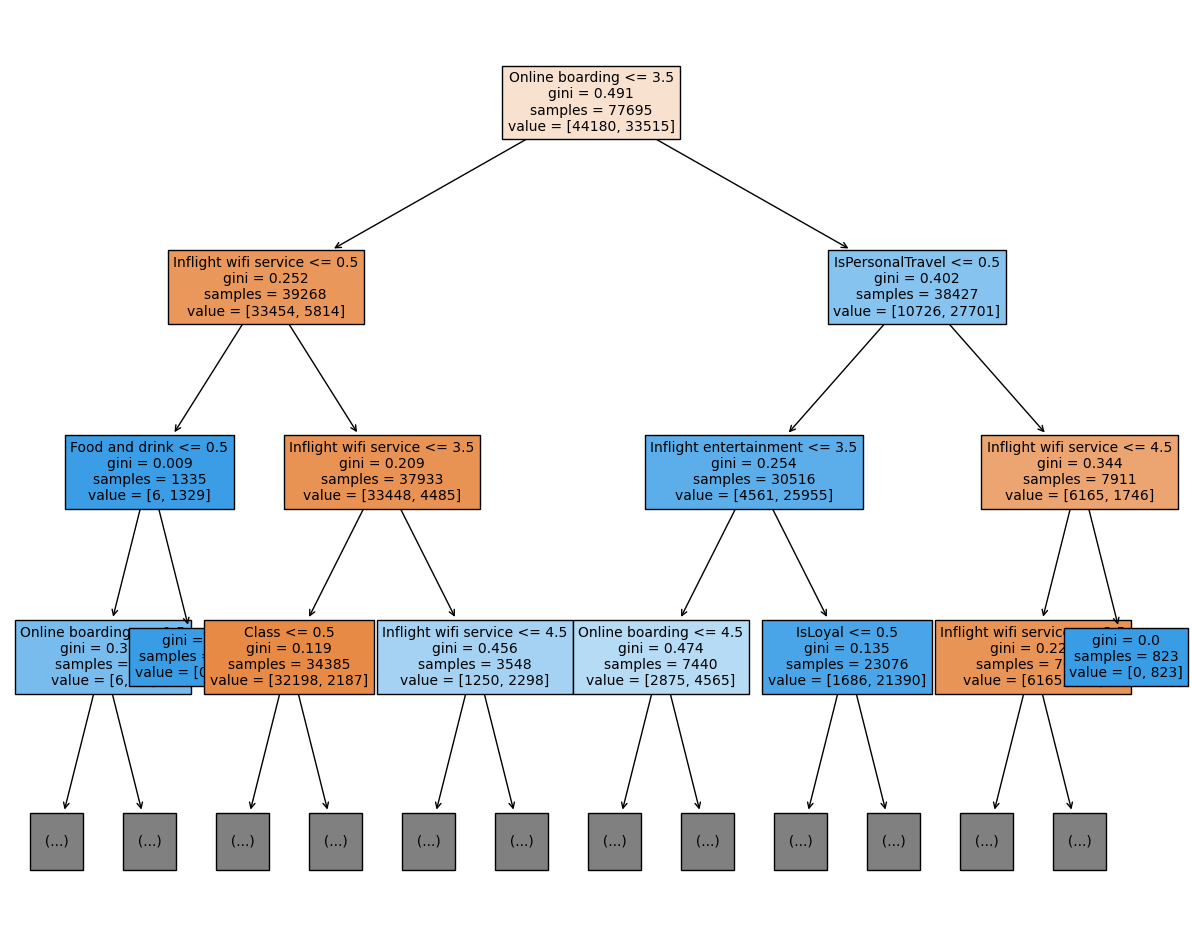

In [122]:
plt.figure(figsize=(15, 12))
plot_tree(gcv.best_estimator_, max_depth=3, feature_names=X.columns, fontsize=10, filled=True);

In [132]:
best_tree = gcv.best_estimator_
best_tree.fit(pd.concat([X_train, X_test]), pd.concat([y_train, y_test]))

DecisionTreeClassifier(max_depth=16, min_samples_leaf=8, random_state=0)

In [146]:
test_df = pd.read_csv(path + 'airline_test.csv').dropna().reset_index(drop=True)
test_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [147]:
test_df.Class = le.transform(test_df.Class)
test_df['IsLoyal'] = test_df['Customer Type'].map({'Loyal Customer': 1, 'disloyal Customer': 0})
test_df['IsFemale'] = test_df.Gender.map({'Male': 0, 'Female': 1})
test_df['IsPersonalTravel'] = test_df['Type of Travel'].map({'Personal Travel': 1, 'Business travel': 0})
test_df.satisfaction = test_df.satisfaction.map({'satisfied': 1, 'neutral or dissatisfied': 0})
test_df.drop(columns=['Unnamed: 0', 'id', 'Gender', 'Type of Travel', 'Customer Type'], inplace=True)
test_df.head()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,IsLoyal,IsFemale,IsPersonalTravel
0,52,1,160,5,4,3,4,3,4,3,...,5,2,5,5,50,44.0,1,1,1,0
1,36,0,2863,1,1,3,1,5,4,5,...,4,3,4,5,0,0.0,1,1,1,0
2,20,1,192,2,0,2,4,2,2,2,...,3,2,2,2,0,0.0,0,0,0,0
3,44,0,3377,0,0,0,2,3,4,4,...,1,3,1,4,0,6.0,1,1,0,0
4,49,1,1182,2,3,4,3,4,1,2,...,2,4,2,4,0,20.0,1,1,1,0


In [149]:
best_y_pred = best_tree.predict(test_df.drop(columns=['satisfaction']))
print("Recall Score = ", recall_score(test_df.satisfaction, best_y_pred))
print("Precision Score= ", precision_score(test_df.satisfaction, best_y_pred))
print("F1 Score = ", f1_score(test_df.satisfaction, best_y_pred))
print("Accuracy Score = ", accuracy_score(test_df.satisfaction, best_y_pred))

Recall Score =  0.9340959084909811
Precision Score=  0.9616813117130175
F1 Score =  0.9476879128727013
Accuracy Score =  0.9547368014521299


We see that the model perform well on not just train and validation data but also on specially held back unknown test data. Thus the model is not over or underfitted and is highly successful

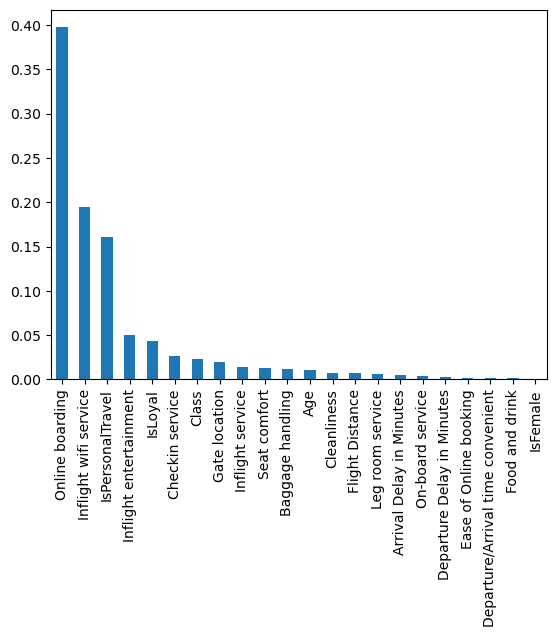

In [150]:
importances = best_tree.feature_importances_

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);

Which features did the model use first to sort the samples?

Online boarding, wifi service and type of travel

## Conclusion

**What are some key takeaways that you learned from this lab?**

- Machine learning workflows may be used to clean and encode data for machine learning.
- While hyperparameter tuning can lead to an increase in performance, it doesn't always.
- The visualization of the decision tree as well as the feature graph can be used to determine which features are most important for a decision tree.
- Also how to truly judge amode using train data, crossvalidation and with-held test data used only once and the best model not changed after getting the test scores.

**What findings would you share with others?**

- Decision trees accurately predicted satisfaction over 94 percent of the time. 
- The confusion matrix is useful as it shows a similar number of true positives and true negatives.
- The visualization of the decision tree and the feature importance graph both suggest that 'Inflight entertainment', 'Online Boarding', and 'Wifi Service' are the most important features in the model. 


**What would you recommend to stakeholders?**

Customer satisfaction is highly tied to 'Inflight entertainment', 'Wifi Service', and 'Online Boarding'. Improving these experiences should lead to better customer satisfaction.
The success of the model suggests that the airline should invest more effort into model building and model understanding since this model semed to be very good at predicting customer satisfaction.